

# <font face = 'calibri' color='red'>Vrush's analysis of the SNAP Reddit Data Set</font>
<p><font size = '4' face = 'calibri' color='black'>There is going to a be variety of different analysis including graph (network) analysis to find interesting behaviors of the people of Reddit. This dataset has a focus on the sentiment (whether it's well meaning or not) of the post  which is the thing that interested me. More of how this was determined could be found in the link below   </font></p>
 <p><font face = 'calibri' size = '4' color='black'>   I plan on making the notebook look cleaner (via some library) at the end of the project where I will hide the cells and present the data</font>
</p>
  <p>To make the notebook look cleaner as of now I put the data extraction and imports on the bottom to reduce scrolling </p> 
  http://snap.stanford.edu/data/soc-RedditHyperlinks.html

## rank_activity(network (adjacency list)) 
Gets the most relevant subreddits with the most data in the adjacency list. Quite a few subs have a thousand hyperlinks (sufficent sample size) but many, I noticed after parsing, have only one which can't have any real analysis done on them besides network related stuff 


In [3]:
subs = rank_activity(network)[1]
subs_with_most_activity = subs[0 : 10]
data_t = "num_unique_words"# This decides what type of data to look for
body_t = True # This decides whether it looks at titles or the body of the post or title

## extract_distribution_plt_data (Look at docstring)
* extract_distribution_plt_data is the function I made to extract variables from the Hyperlink objects I made from the dataset. 
* Each Hyperlink has a lot of instance variables which include, number of words in the post, the sentiment, number of sentences, the LWIC of a variety of grouped words and etc.


In [11]:
x_label = []
correlation = []
distribution_data = []

for sub in  subs_with_most_activity:
    neg_data = extract_distribution_plt_data(network, sub, data_type= data_t,body_check = body_t)
    pos_data = extract_distribution_plt_data(network, sub, neg_sentiment = False, data_type= data_t,body_check = body_t)
    #The if statement is here because some subs don't have links from body posts (seems like a error data collection in the original data set)
    if (len(neg_data) > 0 and len(pos_data) > 0 ): 
        distribution_data += neg_data; x_label += [sub] * len(neg_data); correlation += ["Negative Sentiment"] * len(neg_data)
        distribution_data += pos_data; x_label += [sub] * len(pos_data); correlation += ["Postitive Sentiment"] * len(pos_data)
        

## Distribution of Different Variables according to Sentiment

* A violin plot could be used to easily see correlation of how sentiment (data set already gives every hyperlink a postive or negative sentiment value) might be correlated with these variables

### Findings
* The variables that have to do with length (number of sentences, word count, etc)  of both negative and positive posts tend to be on average pretty similiar across most of the subreddits that have a meaningful amount of data
* There tends to more extreme outliers when posts are positive 
    * This finding was suprising to me because I thought people go on longer tangents when they tend to be mad about something
    * A reasoning for this is most likely because there are more samples of positive posts than negative so a normally distributed dataset will naturally have more outliers. Another point of evidence that supports this is that the 'drama' subreddit has about the same amount of samples of both types and has more extreme outliers on the negative sentiment end.
    



<IPython.core.display.Javascript object>


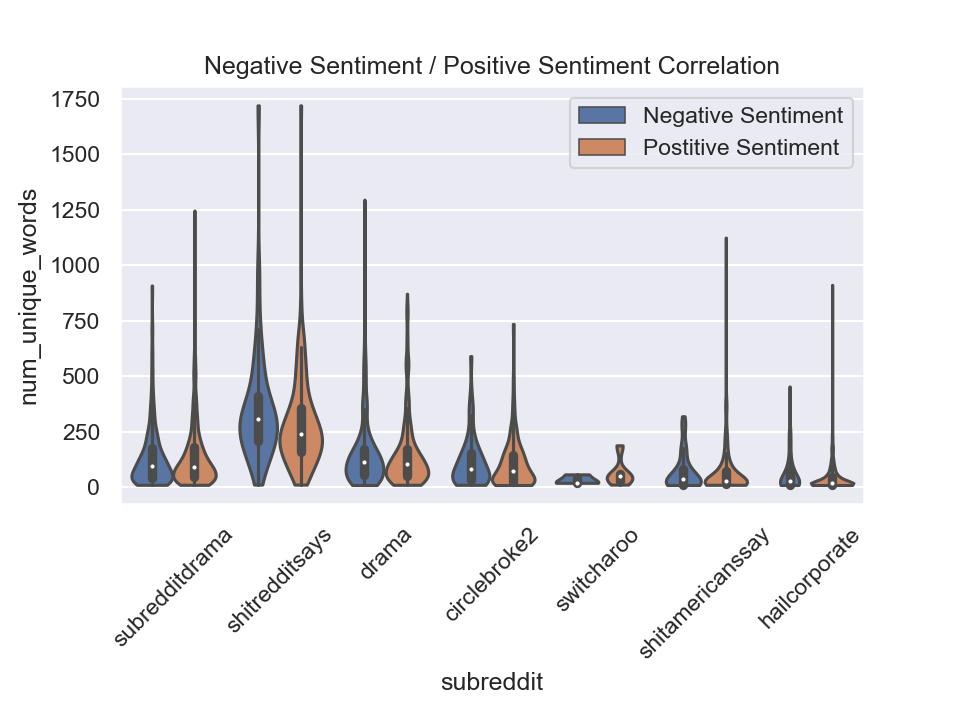

In [32]:
%matplotlib notebook
plt.xticks(rotation=45)
distribution_corr = sb.violinplot(x=x_label, y=distribution_data, hue= correlation, cut = 0)
distribution_corr.set(xlabel ="subreddit", ylabel = data_t, title ='Negative Sentiment / Positive Sentiment Correlation')
plt.gcf().subplots_adjust(bottom=0.30)


In [27]:
df = make_dataframe(network, subs)
negative_posts = df.query('negative_sentiment == 1')
positive_posts = df.query('negative_sentiment == 0')
df.sample(1)


,start_sub,end_sub,post_id,body_check,date_posted,time_posted,negative_sentiment,num_words,num_unique_words,num_of_long_words,avg_word_length,AR_index,positive_sentiment_value,negative_sentiment_value,LWIC_future,LIWC_present,LIWC_past,LWIC_numbers
430775,creepy,pics,2wszxvs,False,2015-02-22,14:23:41,False,15,15,4,4.666667,13.702,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
len(negative_posts)

82210

<IPython.core.display.Javascript object>


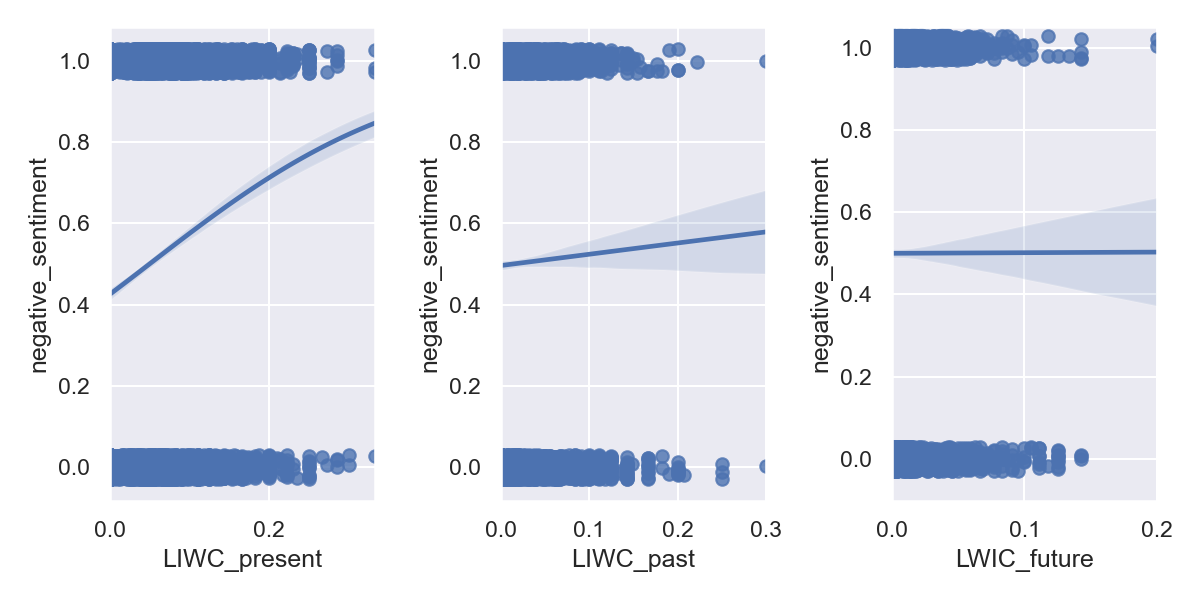

In [139]:
%matplotlib notebook
sample = pd.concat([negative_posts.sample(5000), positive_posts.sample(5000)])
#g = sb.lmplot(x="LWIC_future", y="negative_sentiment", data=sample, ci = .95, y_jitter = .03)
f = plt.figure(figsize=(8, 4))
gs = f.add_gridspec(1, 3)



ax1 = f.add_subplot(gs[0, 0])
ax1 = sb.regplot(x="LIWC_present", y="negative_sentiment", data= sample,
                logistic=True,  y_jitter=.03)

ax2 = f.add_subplot(gs[0, 1])
ax2 = sb.regplot(x="LIWC_past", y="negative_sentiment", data= sample,
                logistic=True,  y_jitter=.03)

ax3 = f.add_subplot(gs[0, 2])
ax3 = sb.regplot(x="LWIC_future", y="negative_sentiment", data= sample,
                logistic=True,  y_jitter=.03)



plt.ylim(-.102, 1.05)
#plt.xlim(0,.15)
#plt.gcf().subplots_adjust( right = .05)
f.tight_layout()


### Parsed text files (not pandas friendly so I later made code to convert  into dataframe) to make graph network in the form of adjacency list 
<p><font size = '4' color='black'>I could have manipulated the .tsv files but making a adjacency list serves a double purpose in that we can still access the data and it gives us a graph data structure to do more analysis</font>
</p>


In [93]:
mega_network = RedditNetwork()
#first make network from hyperlink from bodies of posts
mega_network\
    .make_network("/Users/vrushhabh/PycharmProjects/subreddit-conflict-graph-analyzer/soc-redditHyperlinks-body1.tsv")

#second grow network from hyperlinks from titles of posts
mega_network\
    .make_network("/Users/vrushhabh/PycharmProjects/subreddit-conflict-graph-analyzer/soc-redditHyperlinks-title.tsv"
                  ,False)
network = mega_network.get_network() #get the adjacency list

KeyboardInterrupt: 

In [75]:
import sys
sys.path.append('../')
from reddit_network import RedditNetwork 
from network_analyzer import * 
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sb
import random
import numpy as np
sb.set_theme()